## 回归分析
最基本的回归分析方法是线性回归(linear regression)，它是通过线性函数对变量间定量关系进行统计分析。比如广告的投入金额与获客数量，就可能呈现出线性关系。

<!-- ![image.png](attachment:image.png) -->

<!-- <center>广告投入/新注册用户数</center> -->

In [4]:
import numpy as np # 导入Numpy
import pandas as pd # 导入Pandas
df_sales = pd.read_csv('电商历史订单.csv') # 导入数据集
df_sales # 输出数据

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2022 9:09,绿联usb分线器 一拖四,32,10.95,15100,北京
1,536376,22114,6/1/2022 9:32,加大男装T恤男大码胖子宽松卡,48,50.45,15291,上海
2,536376,21733,6/1/2022 9:32,唐装男夏季青年棉麻中国风加肥,64,86.55,15291,上海
3,536378,22386,6/1/2022 9:37,越南进口白心火龙果4个装,10,108.95,14688,北京
4,536378,85099C,6/1/2022 9:37,大连美早樱桃400g 果径约26mm,10,166.95,14688,北京
...,...,...,...,...,...,...,...,...
87175,581585,21684,6/9/2023 12:31,后续产品说明已经脱敏,12,0.85,15804,深圳
87176,581585,22398,6/9/2023 12:31,后续产品说明已经脱敏,12,0.39,15804,深圳
87177,581585,23328,6/9/2023 12:31,后续产品说明已经脱敏,4,3.75,15804,深圳
87178,581585,23145,6/9/2023 12:31,后续产品说明已经脱敏,12,0.95,15804,深圳


In [5]:
df_sales['总价'] = df_sales['单价'] * df_sales['数量'] # 计算每单的总价

In [6]:
# 输出日期范围（格式转换前）
print('日期范围: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))

日期范围: 1/1/2023 10:11 ~ 9/9/2022 9:20


In [7]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
print('消费日期: %s ~ %s' % (df_sales['消费日期'].min(), df_sales['消费日期'].max()))

消费日期: 2022-06-01 09:09:00 ~ 2023-06-09 12:31:00


In [18]:
# 构建仅含前3个月数据的数据集
df_sales_3m = df_sales[(df_sales. 消费日期 > '2022-06-01') & (df_sales. 消费日期 <= '2022-08-30')]
df_sales_3m.reset_index(drop=True) # 重置索引

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2022-06-01 09:09:00,绿联usb分线器 一拖四,32,10.95,15100,北京,350.4
1,536376,22114,2022-06-01 09:32:00,加大男装T恤男大码胖子宽松卡,48,50.45,15291,上海,2421.6
2,536376,21733,2022-06-01 09:32:00,唐装男夏季青年棉麻中国风加肥,64,86.55,15291,上海,5539.2
3,536378,22386,2022-06-01 09:37:00,越南进口白心火龙果4个装,10,108.95,14688,北京,1089.5
4,536378,85099C,2022-06-01 09:37:00,大连美早樱桃400g 果径约26mm,10,166.95,14688,北京,1669.5
...,...,...,...,...,...,...,...,...,...
14837,545190,22937,2022-08-29 15:32:00,后续产品说明已经脱敏,6,2.50,15656,苏州,15.0
14838,545190,22722,2022-08-29 15:32:00,后续产品说明已经脱敏,40,3.00,15656,苏州,120.0
14839,545190,22457,2022-08-29 15:32:00,后续产品说明已经脱敏,6,5.00,15656,苏州,30.0
14840,545190,22464,2022-08-29 15:32:00,后续产品说明已经脱敏,12,3.00,15656,苏州,36.0


In [19]:
# 生成以“用户码”为主键的对象
df_user_LTV = pd.DataFrame(df_sales_3m['用户码'].unique())
df_user_LTV.columns = ['用户码'] # 设定字段名
df_user_LTV # 输出数据

,用户码
0,15100
1,15291
2,14688
3,15311
4,15862
...,...
365,15951
366,14745
367,15724
368,15874


In [20]:
# 找到每个用户的最近消费日期，构建 df_R_value 对象
df_R_value = df_sales_3m.groupby('用户码'). 消费日期.max().reset_index()
df_R_value.columns = ['用户码', '最近购买日期'] # 设定字段名
df_R_value['R值'] = (df_R_value['最近购买日期'].max() - df_R_value['最近购买日期']).dt.days # 计算最新日期与上次消费日期间的天数
# 把上次消费日期距最新日期的天数（R值）整合至df_user 对象中
df_user_LTV = pd.merge(df_user_LTV, df_R_value[['用户码', 'R值']], on="用户码")

In [21]:
# 计算每个用户的消费次数，构建 df_F_value 对象
df_F_value = df_sales_3m.groupby('用户码'). 消费日期.count().reset_index()
df_F_value.columns = ['用户码', 'F值'] # 设定字段名
# 把消费频率（F值）整合至df_user 对象中
df_user_LTV = pd.merge(df_user_LTV, df_F_value[['用户码', 'F值']], on='用户码')

In [22]:
# 计算每个用户前3个月的消费总额，构建 df_M_value 对象
df_M_value = df_sales_3m.groupby('用户码').总价.sum().reset_index()
df_M_value.columns = ['用户码', 'M值'] # 设定字段名
# 把消费总额（M值）整合至df_user 对象中
df_user_LTV = pd.merge(df_user_LTV, df_M_value[['用户码', 'M值']], on='用户码')


In [23]:
df_user_LTV.head() # 输出df_user_LTV 的前几行数据

,用户码,R值,F值,M值
0,15100,45,7,985.50
1,15291,35,37,16922.75
2,14688,6,88,14700.78
3,15311,5,717,12734.66
4,15862,89,59,1297.71


In [24]:
# 计算每个用户的整年消费总额，构建df_user_1y 对象
df_user_1y = df_sales.groupby('用户码')['总价'].sum().reset_index()
df_user_1y.columns = ['用户码', '年度LTV'] # 设定字段名
df_user_1y.head() # 输出前几行数据

,用户码,年度LTV
0,14681,498.95
1,14682,52.00
2,14684,1236.28
3,14687,628.38
4,14688,18335.88


In [25]:
df_LTV = pd.merge(df_user_LTV, df_user_1y, on='用户码', how='left') # 计算整体LTV，训练数据集
df_LTV # 输出df_LTV

,用户码,R值,F值,M值,年度LTV
0,15100,45,7,985.50,985.50
1,15291,35,37,16922.75,20189.31
2,14688,6,88,14700.78,18335.88
3,15311,5,717,12734.66,59423.99
4,15862,89,59,1297.71,1776.36
...,...,...,...,...,...
365,15951,1,22,375.17,669.57
366,14745,1,7,240.60,1167.16
367,15724,0,5,103.65,212.30
368,15874,0,5,584.35,4330.67


In [26]:
X = df_LTV.drop(['用户码', '年度LTV'], axis=1) # 特征集
X.head() # 输出特征集

,R值,F值,M值
0,45,7,985.50
1,35,37,16922.75
2,6,88,14700.78
3,5,717,12734.66
4,89,59,1297.71


In [27]:
y = df_LTV['年度LTV'] # 标签集
y.head() # 输出标签集

0      985.50
1    20189.31
2    18335.88
3    59423.99
4     1776.36
Name: 年度LTV, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split # 导入train_test_split
# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### 线性回归

In [40]:
from sklearn.linear_model import LinearRegression # 导入线性回归模型
model = LinearRegression() # 创建线性回归模型

In [41]:
model.fit(X_train, y_train) # 拟合模型

LinearRegression()

In [42]:
y_train_preds = model.predict(X_train) # 用模型预测训练集
y_test_preds = model.predict(X_test) # 用模型预测测试集

In [43]:
X_test.iloc[2] # 随机选择一行数据

R值     83.00
F值     64.00
M值    521.69
Name: 80, dtype: float64

In [44]:
y_test_preds[2] # 模型预测值

1376.3506740578225

In [45]:
y_test.iloc[2] # 实际值

1384.68

In [46]:
from sklearn.metrics import r2_score, median_absolute_error # 导入Sklearn评估模块
print('训练集上的R平方分数: %0.4f' % r2_score(y_true=y_train, y_pred=y_train_preds))
print('测试集上的R平方分数: %0.4f' % r2_score(y_true=y_test, y_pred=y_test_preds))

训练集上的R平方分数: 0.6187
测试集上的R平方分数: 0.4778


Text(0.5, 1.0, ' 实际值与预测值')

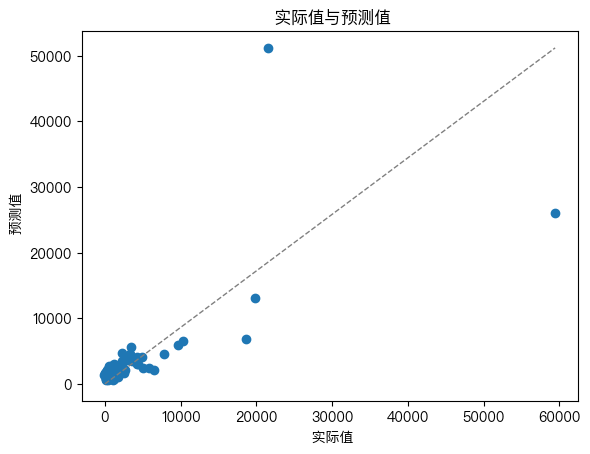

In [47]:
import matplotlib.pyplot as plt # 导入Matplotlib的pyplot
# 设置字体为SimHei，以正常显示中文标签
plt.rcParams["font.family"]=['PingFang']
plt.rcParams["font.sans-serif"]=['PingFang']
# 用来正常显示符号
plt.rcParams["axes.unicode_minus"]=False

plt.scatter(y_test, y_test_preds) # 预测值和实际值的散点图
# 绘图
plt.plot([0, max(y_test)], [0, max(y_test_preds)], color='gray', lw=1, linestyle="--")
plt.xlabel(' 实际值') # x轴
plt.ylabel(' 预测值') # y轴
plt.title(' 实际值与预测值') # 标题